## Reversible Work Theorem Demo Notebook

This notebook demonstrates how to investigate the validity of the reversible work theorem on a (non-equilibrium) system of interest.

### Imports

In [2]:
import sys
sys.path.append('../../lib')
import pypmf, pyrdf

In order to study the reversible work theorem, the radial distribution function, (interparticulate) force distribution (i.e. derivative of the potential of mean force), and the temperature of the system of interest are needed, all of which can be read from file using `pyrdf.read_multiple_files`, `pypmf.read_force_distribution`, and `pypmf.read_multiple_temps`, respectively.

In [7]:
average = True
rdf_paths = ['../data/rwt_data_sample/rdf/'+str(i)+'/cumul_rdf.rdf' for i in range(1, 31)]

rdf = pyrdf.read_multiple_files(average, *rdf_paths)

In [8]:
job_dir = '../data/rwt_data_sample/pmf/'
job_ids = ['42855690', '42855693']

force = pypmf.read_force_distribution(job_dir, *job_ids)

In [10]:
average = True
temp_paths = ['../data/rwt_data_sample/rdf/'+str(i)+'/passive_temp.temp' for i in range(1, 31)]

temp = pypmf.read_multiple_temps(average, *temp_paths)

Lastly, use `pypmf.check_rwt` to check the agreement between two force distribution curves, where one is obtained directly from analysis of LAMMPS simulation output and the other calculated using the reversible work theorem.

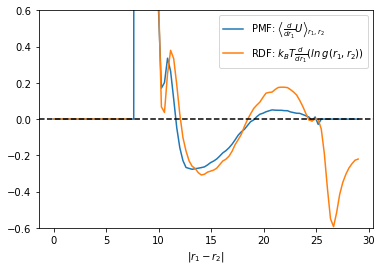

In [14]:
num_bin = 100
cutoff = 29
kwargs = {
    'ylim': [-0.6, 0.6]
}

pypmf.check_rwt(num_bin, cutoff, rdf, force, temp, **kwargs)